In [1]:
# change working directory to one level up
import os
os.chdir('..')
# print(os.getcwd())

In [2]:
# include path to RoboCOP directory
import sys
sys.path.insert(0, 'RoboCOP/pkg/')
import matplotlib.pyplot as plt
from robocop_diff import nuc_diff_map, tf_diff_map, get_diff_tfs, annotate_nucs
from robocop_diff.robocop_diff_plot import plot_diff_cop
from robocop.utils import readData
import seaborn
import pandas
import numpy as np
import matplotlib as mpl
from scripts import reference_data

In [7]:
os.makedirs('outputs', exist_ok=True)

### Download output files:

DM504: https://zenodo.org/records/14542473

DM505: https://zenodo.org/records/14542497

DM506: https://zenodo.org/records/14542523

DM507: https://zenodo.org/records/14542554

DM508: https://zenodo.org/records/14542590

dyanCOP_DM504_505_506_507_508: https://zenodo.org/records/14544159

### Download data and scripts directories and save in current working directory:

https://zenodo.org/records/14544208

In [8]:
dirname1 = 'outputs/DM504_test/'
dirname2 = 'outputs/DM505_test/'
dirname3 = 'outputs/DM506_test/'
dirname4 = 'outputs/DM507_test/'
dirname5 = 'outputs/DM508_test/'
dirnames = [dirname1, dirname2, dirname3, dirname4, dirname5]

In [4]:
# output directory for DynaCOP output
outdir = 'outputs/dynacop_cd_DM504_DM505_DM506_DM507_DM508/'

In [5]:
nuc_df = nuc_diff_map.nuc_map_multiple(dirnames, outdir)  

## Figure 1

Output saved: outputs/dynacop_cd_DM504_DM505_DM506_DM507_DM508/figures/MET2.pdf


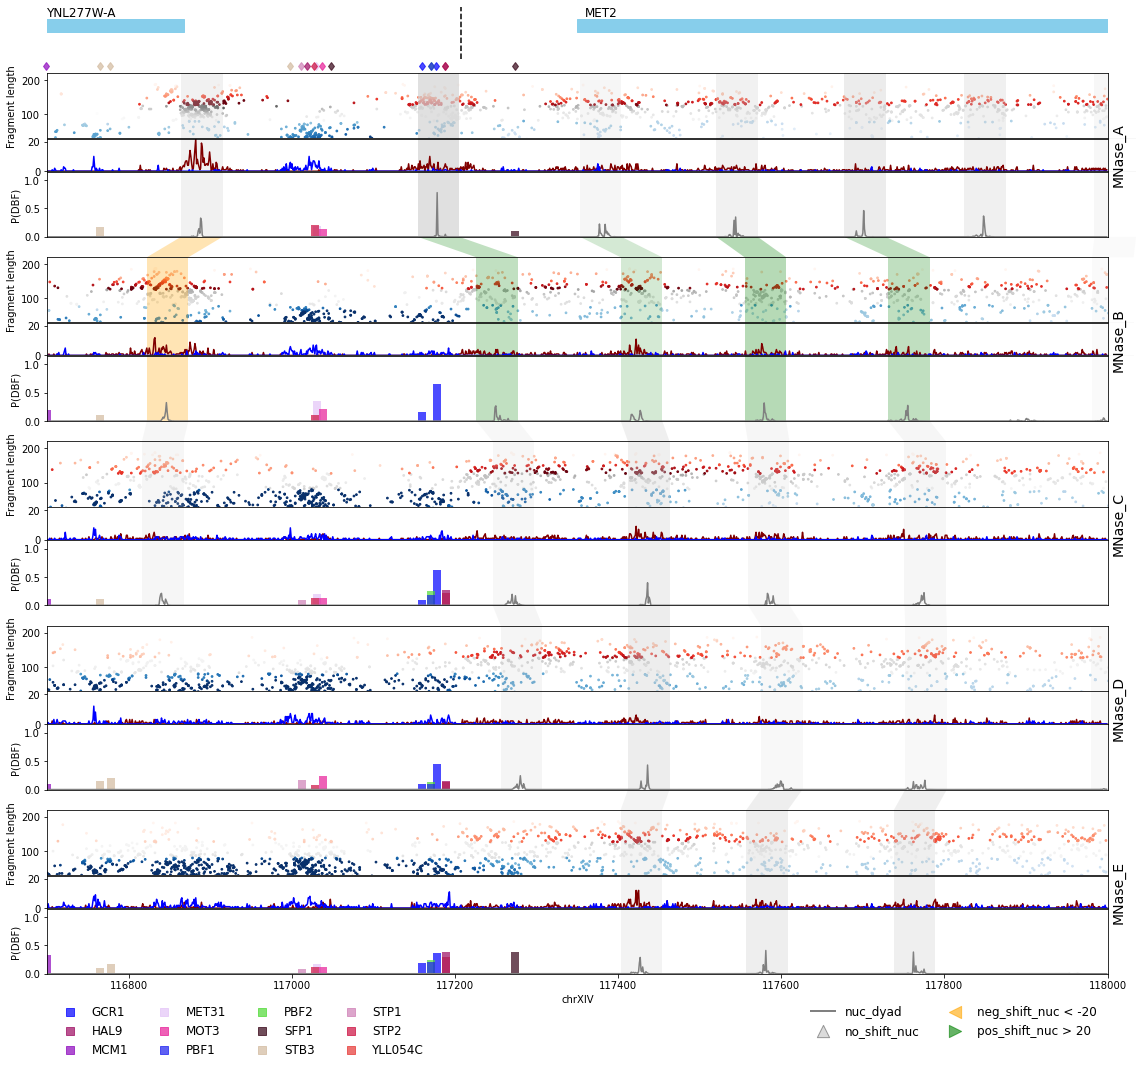

In [6]:
chrm = 'chrXIV'
start = 116700                                                                                                                                                                         
end = 118000                                                                                                                                                                         
plot_diff_cop(outdir, dirnames, chrm, start, end, filename='MET2.pdf')

## Figure 2

In [5]:
nuc_diff_shift_clusters = nuc_diff_map.cluster_nuc_shifts(nuc_df, shift_threshold = 20)

In [101]:
def plot_nuc_shift_heatmap(df):
    g_no_shift = seaborn.clustermap(df[df['shift_type']=='1_no_shift'][['shiftAB', 'shiftBC', 'shiftCD', 'shiftDE']])
    plt.close()
    g_dir_shift = seaborn.clustermap(df[df['shift_type']=='2_directional_shift'][['shiftAB', 'shiftBC', 'shiftCD', 'shiftDE']])
    plt.close()
    g_nondir_shift = seaborn.clustermap(df[df['shift_type']=='3_nondirectional_shift'][['shiftAB', 'shiftBC', 'shiftCD', 'shiftDE']])
    plt.close()
    g_not_always = seaborn.clustermap(df[df['shift_type']=='4_not_always_present'][['shiftAB', 'shiftBC', 'shiftCD', 'shiftDE']].fillna(0))
    plt.close()
    
    df_reordered = pandas.concat([df[df['shift_type']=='1_no_shift'].iloc[g_no_shift.dendrogram_row.reordered_ind],
                    df[df['shift_type']=='2_directional_shift'].iloc[g_dir_shift.dendrogram_row.reordered_ind],
                    df[df['shift_type']=='3_nondirectional_shift'].iloc[g_nondir_shift.dendrogram_row.reordered_ind],
                    df[df['shift_type']=='4_not_always_present'].iloc[g_not_always.dendrogram_row.reordered_ind]])
    # return df_reordered
    
    plt.figure(figsize=(5,20))
    ax = seaborn.heatmap(df_reordered[['shiftAB', 'shiftBC', 'shiftCD', 'shiftDE']], 
                cmap=seaborn.blend_palette(['orange', 'white', 'green'], as_cmap=True),
               vmax=70, vmin=-70, cbar_kws = dict(use_gridspec=False,location="top"), rasterized=True)
    plt.yticks([])
    x = df[df['shift_type']=='1_no_shift'].shape[0]
    plt.axhline(x, color='black')
    x += df[df['shift_type']=='2_directional_shift'].shape[0]
    plt.axhline(x, color='black')
    x += df[df['shift_type']=='3_nondirectional_shift'].shape[0]
    plt.axhline(x, color='black')

    for _, spine in ax.spines.items():
        spine.set_visible(True)


/data/leslie/sneha/anaconda3/envs/robocop-env/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


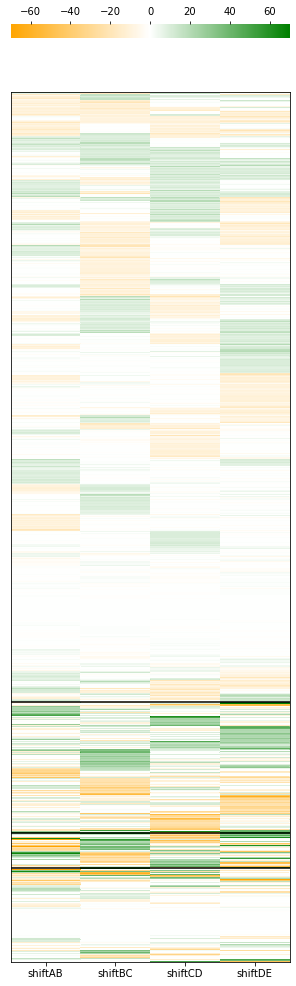

In [57]:
plot_nuc_shift_heatmap(nuc_diff_shift_clusters)
plt.savefig(outdir + 'figures/nuc_diff_shift_clusters.pdf')

In [7]:
nuc_diff_shift_clusters.groupby('shift_type').size()

shift_type
1_no_shift                44374
2_directional_shift        9490
3_nondirectional_shift     2516
4_not_always_present       6851
dtype: int64

Output saved: outputs/dynacop_cd_DM504_DM505_DM506_DM507_DM508/figures/no_shift.pdf


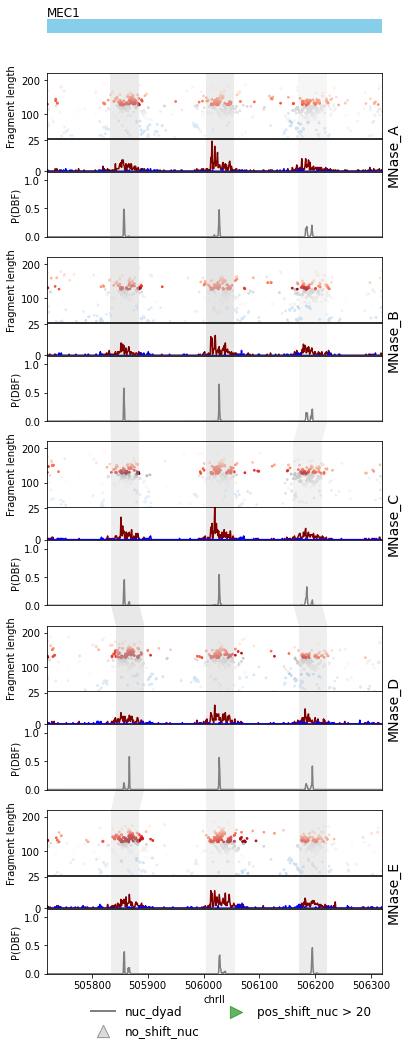

In [11]:
chrm = 'chrII'
start = 505720                                                                                                                                                                         
end = 506320                                                                                                                                                                         
plot_diff_cop(outdir, dirnames, chrm, start, end, filename='no_shift.pdf', figsize=(6,19))

Output saved: outputs/dynacop_cd_DM504_DM505_DM506_DM507_DM508/figures/dir_shift.pdf


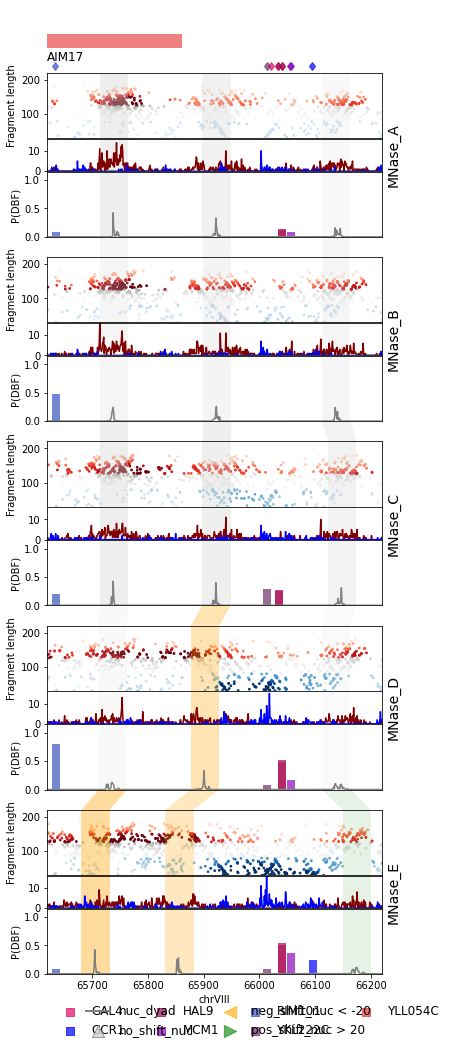

In [12]:
chrm = 'chrVIII'
start = 65620                                                                                                                                                                         
end = 66220                                                                                                                                                                         
plot_diff_cop(outdir, dirnames, chrm, start, end, filename='dir_shift.pdf', figsize=(6,19))

Output saved: outputs/dynacop_cd_DM504_DM505_DM506_DM507_DM508/figures/nondir_shift.pdf


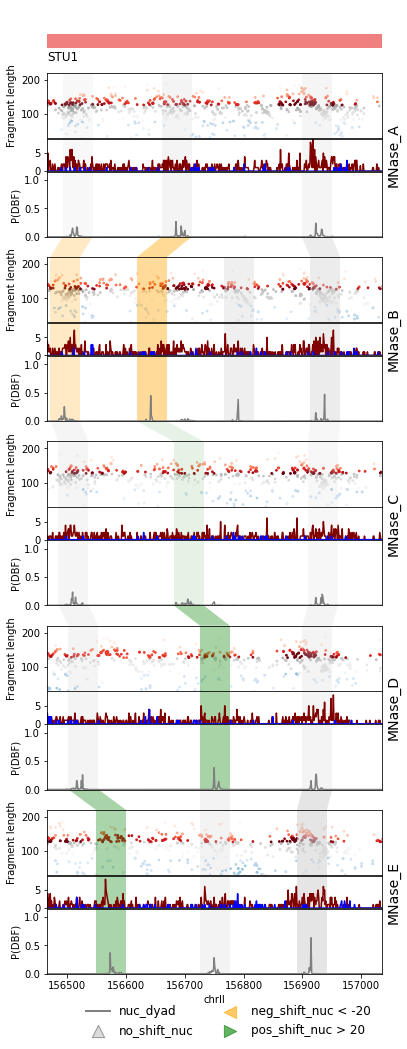

In [13]:
chrm = 'chrII'
start = 156686 - 220                                                                                                                                                                    
end = 156686 + 350                                                                                                                                                             
plot_diff_cop(outdir, dirnames, chrm, start, end, filename='nondir_shift.pdf', figsize=(6,19))

Output saved: outputs/dynacop_cd_DM504_DM505_DM506_DM507_DM508/figures/not_always_present.pdf


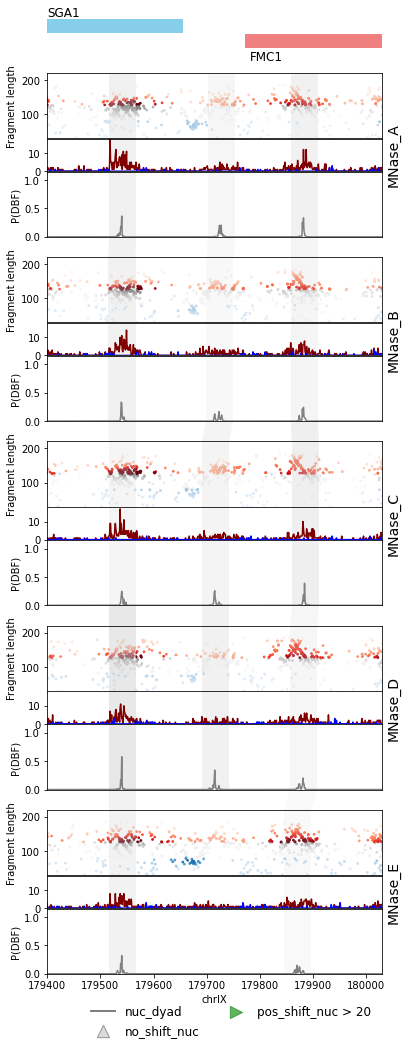

In [14]:
chrm = 'chrIX'
start = 179400                                                                                                                                                                         
end = 180030                                                                                                                                                                         
plot_diff_cop(outdir, dirnames, chrm, start, end, filename='not_always_present.pdf', figsize=(6,19))

## Figure 3

In [8]:
nuc_diff_map_occ = nuc_diff_map.cluster_nucs_occ_pdyad(nuc_df, k=4)

In [9]:
# rename columns for plotting
nuc_diff_map_occ['occ_cluster_new'] = ''
nuc_diff_map_occ.loc[nuc_diff_map_occ['occ_cluster']==1, 'occ_cluster_new'] = 'C1'
nuc_diff_map_occ.loc[nuc_diff_map_occ['occ_cluster']==2, 'occ_cluster_new'] = 'C3'
nuc_diff_map_occ.loc[nuc_diff_map_occ['occ_cluster']==3, 'occ_cluster_new'] = 'C4'
nuc_diff_map_occ.loc[nuc_diff_map_occ['occ_cluster']==4, 'occ_cluster_new'] = 'C2'

In [95]:
from scipy.stats import f_oneway
'''
def calc_significane(df):
    pvals = pandas.DataFrame(columns=['1', '2', 'pval'])
    cols = df.columns[df.columns.str.startswith('pdyad')]
    for i in range(len(cols)-1):
        for j in range(i+1, len(cols)):
            #print(cols[i], cols[j])
            w = wilcoxon(df[cols[i]].values, df[cols[j]].values)[1]
            pvals = pvals.append({'1': cols[i], '2': cols[j], 'pval': w}, ignore_index=True)
    return pvals
'''
def plot_nuc_occ_clusters(df):
    fig, ax = plt.subplots(1, 4, sharey=True, figsize=(25,3.5))
    pdyads = df.columns[df.columns.str.startswith('pdyad')].tolist()
    occ_clusters = sorted(nuc_diff_map_occ['occ_cluster_new'].unique())
    all_pvals = []
    for i in range(len(occ_clusters)):
        df_c = df[df['occ_cluster_new']==occ_clusters[i]][pdyads+['occ_cluster_new']]
        df_c_na = df_c.dropna()
        print(occ_clusters[i])
        #print(f_oneway(df_c_na['pdyadA'],df_c_na['pdyadB'],df_c_na['pdyadC'],df_c_na['pdyadD'],df_c_na['pdyadE']))

        #pvals = calc_significane(df_c)
        #pvals['cluster'] = occ_clusters[i]
        #all_pvals.append(pvals)
        df_c_long = pandas.melt(df_c, value_vars=pdyads, id_vars=['occ_cluster_new'])
        seaborn.lineplot(data=df_c_long, x="variable", y='value', color='grey', ax=ax[i], linestyle='--')
        seaborn.pointplot(data=df_c_long, x="variable", y="value", ci="sd", ax=ax[i], 
                          palette='rainbow')
        ax[i].set_title(occ_clusters[i] + " (" + str(df_c.shape[0]) + " nucs)")
        ax[i].set_xticklabels(['0mins', '7.5mins', '15mins', '30mins', '60mins'], rotation=90)
        ax[i].set_xlabel("")
    ax[0].set_ylabel("P(dyad)")

C1
C2
C3
C4


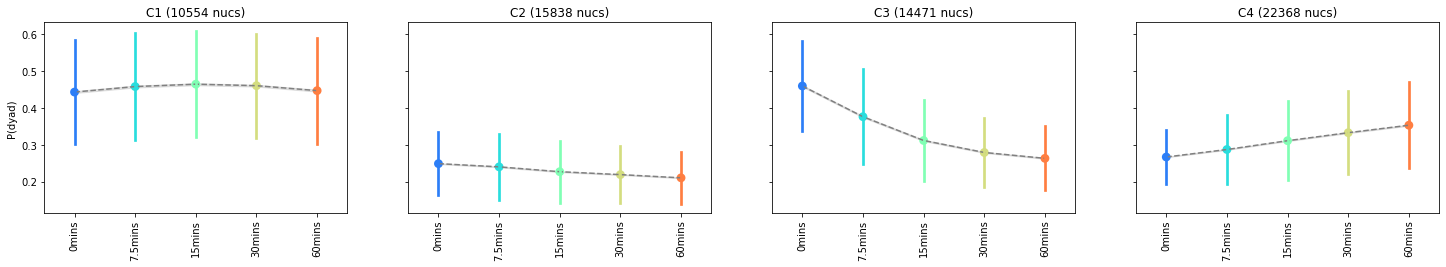

In [96]:
plot_nuc_occ_clusters(nuc_diff_map_occ)
plt.savefig(outdir + 'figures/nuc_diff_occ_clusters.pdf')

In [19]:
mnaseFiles = ['data/DM504_MNase_rep2_0_min.bam',
              'data/DM505_MNase_rep2_7.5_min.bam',
              'data/DM506_MNase_rep2_15_min.bam',
              'data/DM507_MNase_rep2_30_min.bam',
              'data/DM508_MNase_rep2_60_min.bam']

In [20]:
arrs = []
occ_clusters = sorted(nuc_diff_map_occ['occ_cluster_new'].unique())
dyads = sorted(nuc_diff_map_occ.columns[nuc_diff_map_occ.columns.str.startswith('dyad')])

for occ_cluster in occ_clusters:
    arr = np.zeros((5, 201))
    for ix in range(5):        
        for i,r in nuc_diff_map_occ[nuc_diff_map_occ['occ_cluster_new']==occ_cluster].iterrows():
            if np.isnan(r[dyads[ix]]): continue
            arr[ix] += readData.getValuesMNaseOneFileFragmentRange(mnaseFiles[ix],
                            r['chr'], int(r[dyads[ix]]-100), int(r[dyads[ix]]+100), (127,187), 0)
    arrs.append(arr)

In [21]:
arr_norm = arr.copy()

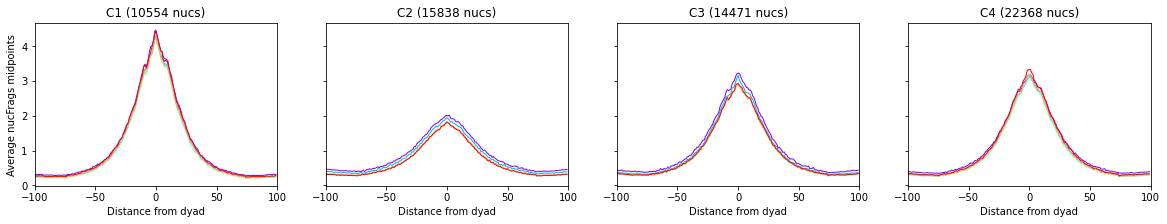

In [22]:
n_lines = 5
cmap = mpl.cm.get_cmap('rainbow') 
colors = cmap(np.linspace(0, 1, n_lines))


fig, ax = plt.subplots(1, 4, figsize=(20,3), sharey=True)
for i in range(4):
    arr_norm = arrs[i].copy()
    arr_norm /= nuc_diff_map_occ[nuc_diff_map_occ['occ_cluster_new']==occ_clusters[i]].shape[0]
    for j in range(5):
        ax[i].plot(range(-100, 100), arr_norm[j][:200], color=colors[j], linewidth=1)
        
    ax[i].set_title(occ_clusters[i] + " (" + 
                    str(nuc_diff_map_occ[nuc_diff_map_occ['occ_cluster_new']==occ_clusters[i]].shape[0]) + 
                    " nucs)")
    ax[i].set_xlim((-100, 100))
    ax[i].set_xlabel("Distance from dyad")
    ax[i].set_xticks([-100, -50, 0, 50, 100])
ax[0].set_ylabel("Average nucFrags midpoints")
plt.savefig(outdir + 'figures/nuc_diff_occ_clusters_coverage.pdf')

## Figure 4

In [10]:
plus_minus_nucs = pandas.read_excel("https://static-content.springer.com/esm/art%3A10.1186%2Fs13059-018-1398-0/MediaObjects/13059_2018_1398_MOESM2_ESM.xlsx", 
                  engine='openpyxl')

In [11]:
nuc_df_ann = annotate_nucs.ann_nucs(nuc_df, plus_minus_nucs, outdir)
nuc_df_ann = nuc_df.join(nuc_df_ann[nuc_df_ann.columns[~nuc_df_ann.columns.isin(nuc_df.columns)]])
nuc_df_ann = nuc_df_ann.join(nuc_diff_shift_clusters[nuc_diff_shift_clusters.columns[~nuc_diff_shift_clusters.columns.isin(nuc_df_ann.columns)]])
nuc_df_ann = nuc_df_ann.join(nuc_diff_map_occ[nuc_diff_map_occ.columns[~nuc_diff_map_occ.columns.isin(nuc_df_ann.columns)]])
nuc_df_ann.pop('occ_cluster')
nuc_df_ann = nuc_df_ann.rename(columns={'occ_cluster_new': 'occ_cluster'})

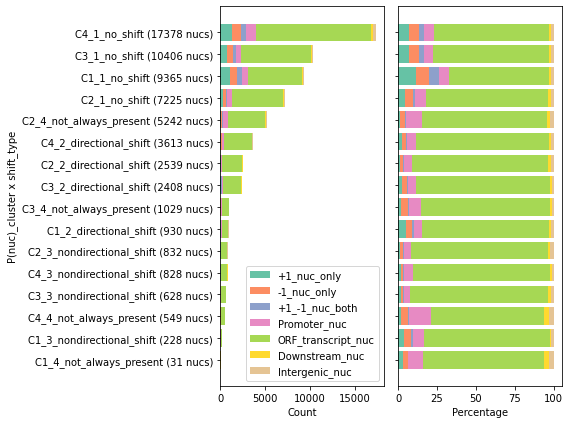

In [12]:
annotate_nucs.plot_nuc_anns(nuc_df_ann)
plt.savefig(outdir + 'figures/nuc_cluster_groups.pdf')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
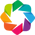

In [26]:
import holoviews as hv
hv.extension('bokeh')

In [27]:
nuc_df_ann_sankey = nuc_df_ann[['shift_type', 'occ_cluster']].rename(columns={'shift_type': 'Source',
                                                                             'occ_cluster': 'Target'})
nuc_df_ann_sankey['Target'] = nuc_df_ann_sankey['Target'].astype(str)
nuc_df_ann_sankey = nuc_df_ann_sankey.groupby(['Source', 'Target']).size().reset_index(name='counts')

In [32]:
sankey = hv.Sankey(nuc_df_ann_sankey)
#sankey.opts(opts.Sankey(cmap='Set1'))
sankey.opts(width=600, height=400, cmap='Dark2', edge_color=hv.dim('Target').str())

:Sankey   [Source,Target]   (counts)

## Figure 5

In [12]:
# run featureCounts on RNA-seq from Tran et al., 2021
# featureCounts -t exon -g gene_id -a data/sacCer3.ensGene.gtf.gz \
#          -o output/rna_seq/featureCounts_counts.txt data/bam/rna_seq/rep1/DM538_RNA_rep1_0_min.bam \
#         data/bam/rna_seq/rep1/DM539_RNA_rep1_7.5_min.bam data/bam/rna_seq/rep1/DM540_RNA_rep1_15_min.bam 
#         data/bam/rna_seq/rep1/DM541_RNA_rep1_30_min.bam data/bam/rna_seq/rep1/DM542_RNA_rep1_60_min.bam -T 10

# Log fold change in TPM wrt 0 mins
def get_tpm(filename):
    counts = pandas.read_csv(filename, sep="\t", comment="#")
    counts.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length', '0', '7.5', '15', '30', '60']
    counts_mat = counts[['0', '7.5', '15', '30', '60']] # .values
    
    rpk = counts_mat.div(counts['Length'].values, axis=0)
    scaling_factor = rpk.sum(axis=0) / 1e6
    counts_mat = rpk.div(scaling_factor, axis=1).values
    
    counts['7.5'] = np.log2(1+counts_mat[:, 1]) - np.log2(1+counts_mat[:, 0])
    counts['15'] = np.log2(1+counts_mat[:, 2]) - np.log2(1+counts_mat[:, 0])
    counts['30'] = np.log2(1+counts_mat[:, 3]) - np.log2(1+counts_mat[:, 0])
    counts['60'] = np.log2(1+counts_mat[:, 4]) - np.log2(1+counts_mat[:, 0])
    counts['0'] = np.log2(1+counts_mat[:, 0]) - np.log2(1+counts_mat[:, 0])
    return counts

In [13]:
# Get TPM counts with columns 0, 7.5, 15, 30, 60
tpm = get_tpm("data/featureCounts_counts.txt")
tpm.head()

Geneid    Chr  Start    End Strand  Length    0       7.5        15  \
0    YDL248W  chrIV   1802   2953      +    1152  0.0 -0.106795  0.693110   
1  YDL247W-A  chrIV   3762   3836      +      75  0.0  0.000000  0.000000   
2    YDL247W  chrIV   5985   7814      +    1830  0.0  0.000000  0.000000   
3    YDL246C  chrIV   8683   9756      -    1074  0.0  0.000000  0.000000   
4    YDL245C  chrIV  11657  13360      -    1704  0.0 -0.147941  0.005039   

         30        60  
0  1.512735  2.013035  
1  0.000000  0.000000  
2  0.000000  0.000000  
3  0.000000  0.000000  
4  0.242282  0.517632

In [14]:
def get_nuc_shift_wrt_0(df, nuc_type):
    df.columns=['7.5', '15', '30', '60']
    df['15'] = df['15'] + df['7.5']
    df['30'] = df['30'] + df['15']
    df['60'] = df['60'] + df['30']
    df = df.unstack().reset_index()
    df['nuc_type'] = nuc_type
    #df = df.fillna(0)
    return df

def plot_gene_based_clusters(nuc_df_ann, outdir, plus_minus_nucs, tpm, k):
    gene_nucs_df = nuc_diff_map.cluster_gene_nucs(nuc_df_ann, outdir, plus_minus_nucs, k=k)
    # manually changing cluster ordering for better visualization
    gene_nucs_df['old_cluster'] = gene_nucs_df['cluster'].copy()
    gene_nucs_df.loc[gene_nucs_df['old_cluster']==0, 'cluster'] = 1
    gene_nucs_df.loc[gene_nucs_df['old_cluster']==1, 'cluster'] = 2
    gene_nucs_df.loc[gene_nucs_df['old_cluster']==2, 'cluster'] = 0
    gene_nucs_df.loc[gene_nucs_df['old_cluster']==3, 'cluster'] = 3
    gene_nucs_df.loc[gene_nucs_df['old_cluster']==4, 'cluster'] = 4

    fig, ax = plt.subplots(3, k, figsize=(15,8))

    for i in range(k):
            
        # plot shifts
        gene_nucs_k_p1 = gene_nucs_df[gene_nucs_df['cluster']==i].copy()
        gene_nucs_k_p1 = gene_nucs_k_p1[gene_nucs_k_p1.columns[gene_nucs_k_p1.columns.str.startswith('p1_shift_')]]
        gene_nucs_k_p1 = get_nuc_shift_wrt_0(gene_nucs_k_p1, '+1_nuc')
        
        gene_nucs_k_m1 = gene_nucs_df[gene_nucs_df['cluster']==i].copy()
        gene_nucs_k_m1 = gene_nucs_k_m1[gene_nucs_k_m1.columns[gene_nucs_k_m1.columns.str.startswith('m1_shift_')]]
        gene_nucs_k_m1 = get_nuc_shift_wrt_0(gene_nucs_k_m1, '-1_nuc')

        gene_nucs_k = pandas.concat([gene_nucs_k_p1, gene_nucs_k_m1])
        
        seaborn.pointplot(data=gene_nucs_k, x='level_0', y=0, hue='nuc_type', ax=ax[0][i], ci=None)
        ax[0][i].grid(visible=True)
        ax[0][i].set_ylim((-80, 100))
        ax[0][i].set_xlabel('')
        if i != k-1: 
            ax[0][i].get_legend().remove()
        else: ax[0][i].legend(bbox_to_anchor=(1.8, 1.05), frameon=False)
        if i != 0:
            ax[0][i].set_ylabel('')
        else:
            ax[0][i].set_ylabel('nuc shift')
        ax[0][i].set_title('G' + str(i+1) + ' (' + str(gene_nucs_df[gene_nucs_df['cluster']==i].shape[0]) + ' genes)')
        
        # plot dyads
        gene_nucs_k_p1 = gene_nucs_df[gene_nucs_df['cluster']==i].copy()
        gene_nucs_k_p1 = gene_nucs_k_p1[gene_nucs_k_p1.columns[gene_nucs_k_p1.columns.str.startswith('p1_pdyad')]]
        gene_nucs_k_p1.columns = ['0', '7.5', '15', '30', '60']
        gene_nucs_k_p1 = gene_nucs_k_p1.unstack().reset_index()
        gene_nucs_k_p1['nuc_type'] = '+1_nuc'
        gene_nucs_k_m1 = gene_nucs_df[gene_nucs_df['cluster']==i].copy()
        gene_nucs_k_m1 = gene_nucs_k_m1[gene_nucs_k_m1.columns[gene_nucs_k_m1.columns.str.startswith('m1_pdyad')]]
        gene_nucs_k_m1.columns = ['0', '7.5', '15', '30', '60']
        gene_nucs_k_m1 = gene_nucs_k_m1.unstack().reset_index()
        gene_nucs_k_m1['nuc_type'] = '-1_nuc'
        gene_nucs_k_o = gene_nucs_df[gene_nucs_df['cluster']==i].copy()
        gene_nucs_k_o = gene_nucs_k_o[gene_nucs_k_o.columns[gene_nucs_k_o.columns.str.startswith('orf_pdyad')]]
        gene_nucs_k_o.columns = ['0', '7.5', '15', '30', '60']
        gene_nucs_k_o = gene_nucs_k_o.unstack().reset_index()
        gene_nucs_k_o['nuc_type'] = 'gene_body_nuc'

        gene_nucs_k = pandas.concat([gene_nucs_k_p1, gene_nucs_k_m1, gene_nucs_k_o])
        
        seaborn.pointplot(data=gene_nucs_k, x='level_0', y=0, hue='nuc_type', ax=ax[1][i], ci=None, 
                                  palette=['#2ca02c', '#d62728', '#9467bd'])
        ax[1][i].set_ylim((0, 0.6))
        ax[1][i].grid(visible=True)
        ax[1][i].set_xlabel('')
        if i != k-1: ax[1][i].get_legend().remove()
        else: 
            ax[1][i].legend(bbox_to_anchor=(2.3, 1.05), frameon=False)
        if i != 0:
            ax[1][i].set_ylabel('')
        else:
            ax[1][i].set_ylabel('P(dyad)')
            
    # plot TPM
    gene_nucs_df = gene_nucs_df.merge(tpm ,left_index=True, right_on='Geneid')
    for i in range(k):
        gene_tpm = gene_nucs_df[gene_nucs_df['cluster']==i].copy()
        gene_tpm = gene_tpm[['0', '7.5', '15', '30', '60']].unstack().reset_index()
        seaborn.pointplot(data=gene_tpm, x='level_0', y=0, ax=ax[2][i], ci=None, color='brown')
        ax[2][i].grid(visible=True)
        ax[2][i].set_ylim((-2.5, 2.5))
        ax[2][i].set_xlabel('')
        if i != 0:
            ax[2][i].set_ylabel('')
        else:
            ax[2][i].set_ylabel('log_2((1+TPM_t)/(1+TPM_0))')
    return gene_nucs_df

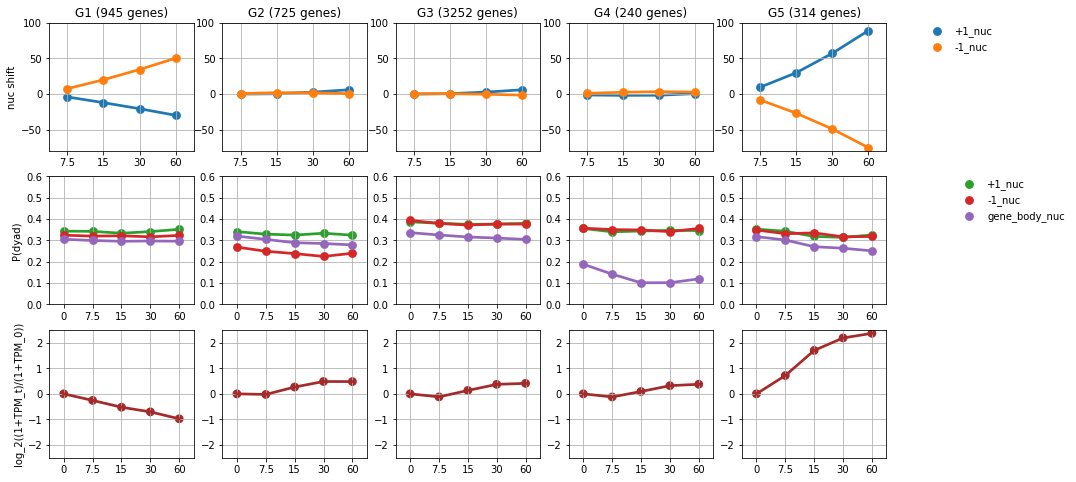

In [15]:
gene_nucs_df = plot_gene_based_clusters(nuc_df_ann, outdir, plus_minus_nucs, tpm, k=5)
#gene_nucs_df = plot_gene_based_clusters(None, outdir, None, tpm, k=5)
plt.savefig(outdir + 'figures/nuc_cluster_shift_occ.pdf')

## Figure 6

In [16]:
gene_nucs_df = gene_nucs_df.rename(columns={'Geneid': 'gene'})

In [17]:
tf_tbl = get_diff_tfs.get_tf_gene_promoter(dirnames, outdir, plus_minus_nucs)

In [18]:
tf_sites = tf_tbl.copy()

In [19]:
tf_sites = tf_sites[tf_sites['gene'] != '']
tf_sites['gene'] = [r['gene'].split(',') for i,r in tf_sites.iterrows()]
tf_sites = tf_sites.explode('gene')

In [20]:
tf_sites = tf_sites[~tf_sites['gene'].isna()]

In [21]:
tf_sites = tf_sites.merge(gene_nucs_df, on='gene')
tf_sites

chr   start     end    scoreA    scoreB    scoreC    scoreD  \
0        chrI   69760   69767  0.008944  0.029017  0.001902  0.110118   
1        chrI   69751   69770  0.096024  0.138496  0.006297  0.159826   
2        chrI   69727   69737  0.068617  0.144113  0.010726  0.054717   
3        chrI   69713   69722  0.353440  0.000000  0.373642  0.631718   
4        chrI   69829   69838  0.089158  0.678304  0.624615  0.738078   
...       ...     ...     ...       ...       ...       ...       ...   
29344    chrX  624676  624684  0.000093  0.000000  0.000000  0.144335   
29345  chrXVI   47068   47077  0.009178  0.116294  0.001890  0.001249   
29346  chrXII  771822  771830  0.139337  0.063751  0.173264  0.115382   
29347  chrXII  771822  771830  0.139337  0.063751  0.173264  0.115382   
29348  chrXII  554319  554328  0.116629  0.016715  0.025803  0.003820   

         scoreE    TF     gene  ...     Chr   Start     End  Strand  Length  \
0      0.001480  PDR1  YAL039C  ...    chrI   68716   69525       -     810   
1      0.000438  GAL4  YAL039C  ...    chrI   68716   69525       -     810   
2      0.000940  SFP1  YAL039C  ...    chrI   68716   69525       -     810   
3      0.000000  AZF1  YAL039C  ...    chrI   68716   69525       -     810   
4      0.820793  AZF1  YAL039C  ...    chrI   68716   69525       -     810   
...         ...   ...      ...  ...     ...     ...     ...     ...     ...   
29344  0.000090  HCM1  YJR106W  ...    chrX  624838  627015       +    2178   
29345  0.004148  MOT3  YPL262W  ...  chrXVI   47336   48802       +    1467   
29346  0.000410  STP3  YLR319C  ...  chrXII  769318  771684       -    2367   
29347  0.000410  STP3  YLR320W  ...  chrXII  771940  776304       +    4365   
29348  0.047912  STP2  YLR206W  ...  chrXII  554578  556419       +    1842   

         0       7.5        15        30        60  
0      0.0  0.042592  0.814619  1.248272  0.938409  
1      0.0  0.042592  0.814619  1.248272  0.938409  
2      0.0  0.042592  0.814619  1.248272  0.938409  
3      0.0  0.042592  0.814619  1.248272  0.938409  
4      0.0  0.042592  0.814619  1.248272  0.938409  
...    ...       ...       ...       ...       ...  
29344  0.0  0.261288  1.427361  2.638423  2.947048  
29345  0.0 -0.153087  0.066232  0.396135  0.814547  
29346  0.0 -0.359542 -0.509265 -0.475514 -0.396639  
29347  0.0 -0.365186 -0.345002 -0.162671 -0.284100  
29348  0.0  0.248074  1.318073  1.692581  1.853361  

[29349 rows x 45 columns]

In [22]:
tf_tbl_cluster = tf_tbl.merge(gene_nucs_df[['gene', 'cluster']], left_on='gene', right_on='gene')

In [23]:
dfs = []
for c in tf_tbl_cluster['cluster'].unique():

    tf_tbl_cluster_i = tf_tbl_cluster[tf_tbl_cluster['cluster']==c]
    tf_gene_scores = tf_tbl_cluster_i[tf_tbl_cluster_i['scoreA'] > 0.1].groupby('TF').size().reset_index(name='0')
    tf_gs = tf_tbl_cluster_i[tf_tbl_cluster_i['scoreB'] > 0.1].groupby('TF').size().reset_index(name='7.5')
    tf_gene_scores = tf_gene_scores.merge(tf_gs, on='TF')
    tf_gs = tf_tbl_cluster_i[tf_tbl_cluster_i['scoreC'] > 0.1].groupby('TF').size().reset_index(name='15')
    tf_gene_scores = tf_gene_scores.merge(tf_gs, on='TF')
    tf_gs = tf_tbl_cluster_i[tf_tbl_cluster_i['scoreD'] > 0.1].groupby('TF').size().reset_index(name='30')
    tf_gene_scores = tf_gene_scores.merge(tf_gs, on='TF')
    tf_gs = tf_tbl_cluster_i[tf_tbl_cluster_i['scoreE'] > 0.1].groupby('TF').size().reset_index(name='60')
    tf_gene_scores = tf_gene_scores.merge(tf_gs, on='TF')
    # retain TFs binding to at least 2% of genes at any time point
    tf_gene_scores = tf_gene_scores.set_index('TF')
    tf_gene_scores = tf_gene_scores[tf_gene_scores.max(1) > 0.02*tf_tbl_cluster_i['gene'].unique().shape[0]]
    tf_gene_scores['cluster'] = c
    dfs.append(tf_gene_scores)

tf_gene_scores = pandas.concat(dfs)
select_tfs = tf_gene_scores.reset_index()['TF'].unique()

In [24]:
sorted(select_tfs), select_tfs.shape

(['ABF1',
  'ASG1',
  'AZF1',
  'CHA4',
  'DAL82',
  'GAL4',
  'GCR1',
  'HAL9',
  'MBP1',
  'MCM1',
  'MET31',
  'MOT3',
  'NRG2',
  'PBF1',
  'PBF2',
  'RAP1',
  'RDR1',
  'REB1',
  'RGT1',
  'RIM101',
  'RPN4',
  'RSC3',
  'RSC30',
  'RTG3',
  'SFL1',
  'SFP1',
  'SKN7',
  'SOK2',
  'STB3',
  'STP1',
  'STP2',
  'STP4',
  'SWI4',
  'TYE7',
  'UME6',
  'YBR033W',
  'YGR067C',
  'YKL222C',
  'YLL054C',
  'YPR196W'],
 (40,))

In [25]:
tf_counts = tf_tbl_cluster.drop_duplicates(subset=['TF', 'gene', 'cluster']).groupby(['TF', 'cluster']).size().reset_index(name='counts')
cluster_counts = tf_tbl_cluster.drop_duplicates(subset=['gene', 'cluster']).groupby('cluster').size().reset_index(name='cluster_counts')
tf_counts = tf_counts.merge(cluster_counts, on='cluster')
tf_counts['counts'] = tf_counts['counts'] / tf_counts['cluster_counts']
tf_counts = tf_counts[tf_counts['TF'].isin(select_tfs)]
tf_counts = tf_counts.pivot(index='TF', columns='cluster', values='counts').fillna(0)
tf_counts.columns = ['G' + str(i+1) for i in tf_counts.columns]

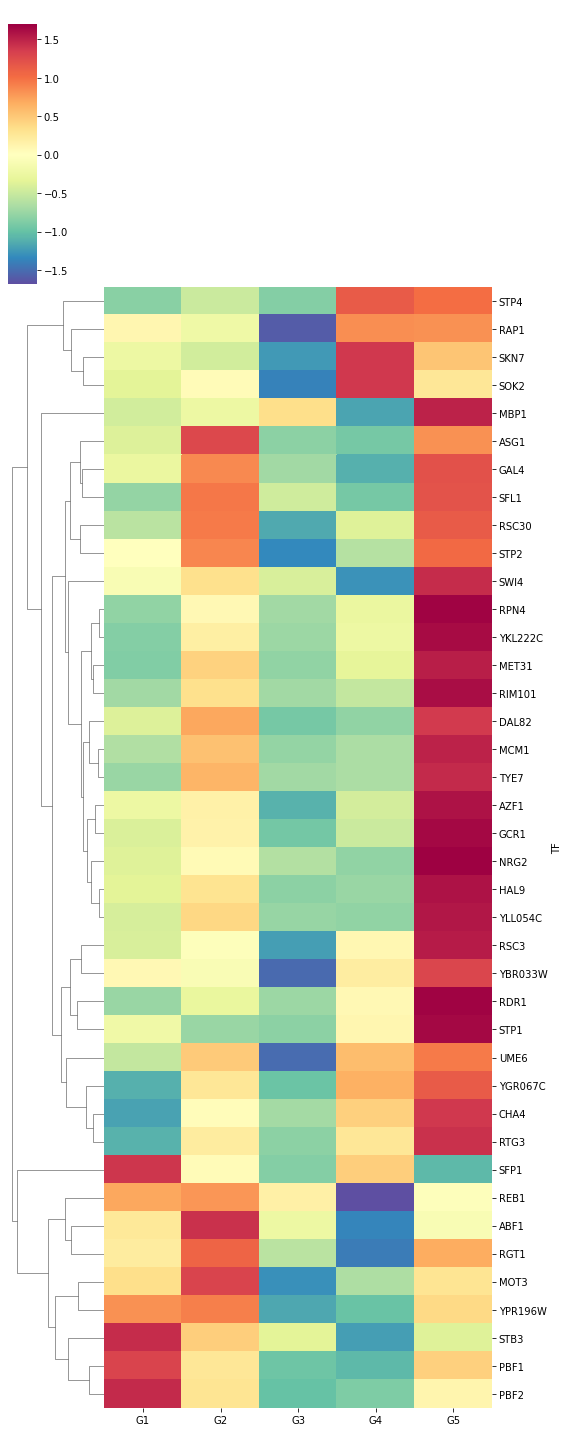

In [26]:
seaborn.clustermap(tf_counts, z_score=0, cmap='Spectral_r', yticklabels=1, figsize=(8, 20),
                  col_cluster=False)
plt.savefig(outdir + 'figures/tf_groups.pdf')

Output saved: outputs/dynacop_cd_DM504_DM505_DM506_DM507_DM508/figures/RPL15A.pdf


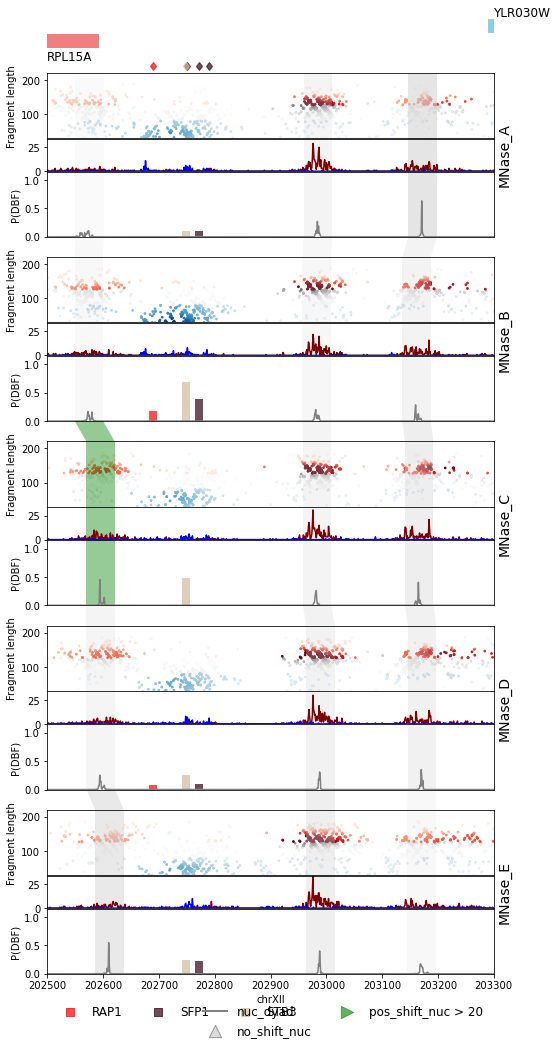

In [74]:
chrm = 'chrXII'
start = 202500                                                                                                                                                                         
end = 203300                                                                                                                                                                         
plot_diff_cop(outdir, dirnames, chrm, start, end, filename='RPL15A.pdf', figsize=(8,19))

Output saved: outputs/dynacop_cd_DM504_DM505_DM506_DM507_DM508/figures/HSP82.pdf


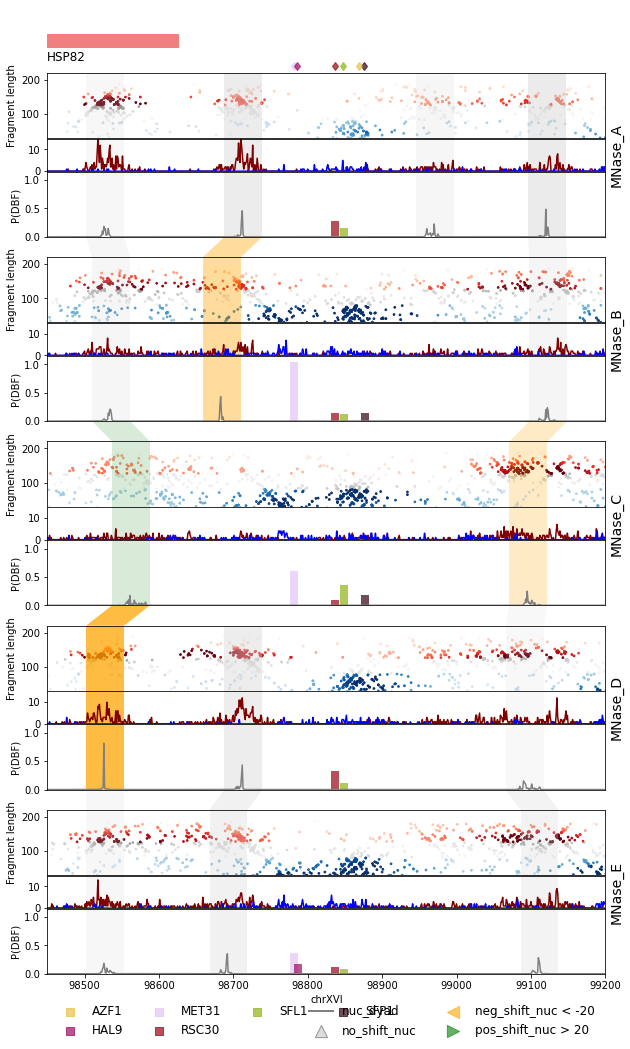

In [75]:
chrm = 'chrXVI'
start = 98450                                                                                                                                                                         
end = 99200                                                                                                                                                                         
plot_diff_cop(outdir, dirnames, chrm, start, end, filename='HSP82.pdf', figsize=(10,19))

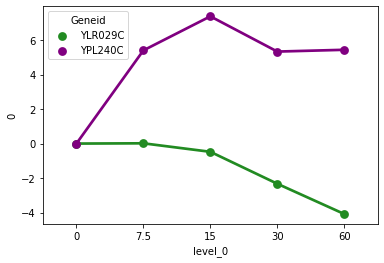

In [94]:
# RPL15A: YLR029C
# HSP82: YPL240C
seaborn.pointplot(data=tpm[tpm['Geneid'].isin(['YLR029C', 'YPL240C'])][['Geneid', '0', 
                                '7.5', '15', '30', '60']].set_index('Geneid').unstack().reset_index(),
                  x='level_0', y=0, hue='Geneid', palette=['forestgreen', 'purple'])
plt.savefig(outdir + 'figures/tpm_genes.pdf')

# Supplementary

In [27]:
import goatools as goa
from goatools.obo_parser import GODag
from goatools.go_enrichment import GOEnrichmentStudy

In [28]:
orfs_with_go = reference_data.read_sgd_orfs()

In [29]:
assoc = {}
for idx, gene in orfs_with_go.iterrows():
    #assoc[gene['name']] = set(gene.ontology.split(','))
    assoc[idx] = set(gene.ontology.split(','))

In [30]:
obodag = GODag("data/go.obo")

data/go.obo: fmt(1.2) rel(2018-08-29) 47,313 Terms


In [31]:
goeaobj = GOEnrichmentStudy(
            assoc.keys(), # List of protein-coding genes                                                           
            assoc, # geneid/GO associations                                                                        
            obodag, # Ontologies                                                                              
            propagate_counts=False,
            alpha=0.05, # default significance cut-off                                                             
            methods=['fdr_bh'])


Load  Ontology Enrichment Analysis ...
100%  6,575 of  6,575 population items found in association


In [32]:
# Adapted from Tran et al., 2021

def get_goa_df(goea_results_all):
        
    cols = ['id', 'name', 'pop_count', 'pop_n',
                'study_count','study_n', 'pop_items', 'study_items', 'fdr_bh'] 

    results_dic = {}

    for c in cols:
            results_dic[c] = []

    for g in goea_results_all:
        #print(dir(g))
        #print(g.p_bonferroni, g.enrichment, g.NS)
        study_items = ','.join(g.study_items)
        name = g.name
        fdr = g.p_fdr_bh
        pop_items = ','.join(g.pop_items)

        results_dic['id'].append(g.GO)
        results_dic['name'].append(name)

        for method in ['fdr_bh']:
                results_dic[method].append(g.__dict__['p_' +
                    method.replace('-', '_')])

        results_dic['study_items'].append(study_items)
        results_dic['pop_items'].append(pop_items)
        results_dic['study_count'].append(g.study_count)
        results_dic['pop_count'].append(g.pop_count)
        results_dic['study_n'].append(g.study_n)
        results_dic['pop_n'].append(g.pop_n)

    results_df = pandas.DataFrame(results_dic)
    results_df = results_df[cols].sort_values('fdr_bh').reset_index(drop=True)
    results_sig_df = results_df[
            (results_df.fdr_bh < 0.05) &
            (results_df.study_count > 0)
            ]
    return results_df # results_sig_df
    # return results_sig_df


In [42]:
dfs = []
for c in gene_nucs_df['cluster'].unique():
    goea_results_all = goeaobj.run_study(gene_nucs_df[gene_nucs_df['cluster']==c]['gene'].values)
    goa_df = get_goa_df(goea_results_all)
    goa_df['cluster'] = c
    dfs.append(goa_df)
    
goa_df = pandas.concat(dfs)
goa_df['minus_log10(fdr_bh)'] = -np.log10(goa_df['fdr_bh'])
#goa_df = goa_df[goa_df['minus_log10(fdr_bh)'] > 1]


Runing  Ontology Analysis: current study set of 3251 IDs.
100%  3,251 of  3,251 study items found in association
100%  3,251 of  3,251 study items found in population(6575)
Calculating 3,654 uncorrected p-values using fisher_scipy_stats
   3,654 terms are associated with  6,575 of  6,575 population items
   2,902 terms are associated with  3,251 of  3,251 study items
  METHOD fdr_bh:
      27 GO terms found significant (< 0.05=alpha) ( 20 enriched +   7 purified): statsmodels fdr_bh
   2,050 study items associated with significant GO IDs (enriched)
   1,312 study items associated with significant GO IDs (purified)

Runing  Ontology Analysis: current study set of 945 IDs.
100%    945 of    945 study items found in association
100%    945 of    945 study items found in population(6575)
Calculating 3,654 uncorrected p-values using fisher_scipy_stats
   3,654 terms are associated with  6,575 of  6,575 population items
   1,486 terms are associated with    945 of    945 study items
  METHO

In [43]:
gene_nucs_df.groupby('cluster').size()

cluster
0     945
1     725
2    3251
3     239
4     314
dtype: int64

In [44]:
goa_df[goa_df['cluster']==4].sort_values(by='minus_log10(fdr_bh)')
goa_df[(goa_df['name'].str.contains('sul')) & (goa_df['cluster']==4) & (goa_df['minus_log10(fdr_bh)'] > 0)]
goa_df[(goa_df['cluster']==4) & (goa_df['minus_log10(fdr_bh)'] > 1)]
goa_df[(goa_df['name']=="response to stress")]

#top_10 = []
#for c in gene_nucs_df['cluster'].unique():
#    top_10.extend(goa_df[(goa_df['cluster']==c) & 
#                         (goa_df['minus_log10(fdr_bh)'] > 0)].sort_values(by='minus_log10(fdr_bh)',
#                                                            ascending=False)['name'].values.tolist()[:20])
    
#top_10 = list(set(top_10))

id                name  pop_count  pop_n  study_count  study_n  \
3591  GO:0006950  response to stress         55   6575           26     3251   
54    GO:0006950  response to stress         55   6575            2      945   
11    GO:0006950  response to stress         55   6575           10      314   
2310  GO:0006950  response to stress         55   6575            2      239   
10    GO:0006950  response to stress         55   6575           14      725   

                                              pop_items  \
3591  YMR261C,YDR074W,YOL109W,YOR324C,YHL028W,YIL101...   
54    YMR261C,YDR074W,YOL109W,YOR324C,YHL028W,YIL101...   
11    YMR261C,YDR074W,YOL109W,YOR324C,YHL028W,YIL101...   
2310  YMR261C,YDR074W,YOL109W,YOR324C,YHL028W,YIL101...   
10    YMR261C,YDR074W,YOL109W,YOR324C,YHL028W,YIL101...   

                                            study_items    fdr_bh  cluster  \
3591  YMR261C,YOR324C,YLR266C,YOR043W,YBR072W,YER011...  1.000000        2   
54                                      YDR184C,YOL128C  0.966835        0   
11    YNL281W,YDR074W,YBR082C,YAL005C,YFL033C,YOL081...  0.069924        4   
2310                                    YML014W,YAL028W  1.000000        3   
10    YFL053W,YKL062W,YML100W,YOL109W,YMR251W-A,YPL2...  0.668816        1   

      minus_log10(fdr_bh)  
3591            -0.000000  
54               0.014648  
11               1.155373  
2310            -0.000000  
10               0.174693

In [45]:
goa_df_wide = goa_df.pivot(index='name', columns='cluster', values='minus_log10(fdr_bh)').fillna(0)
clusters = goa_df_wide.columns
top_10 = []
for c in clusters: 
    print("Cluster", c)
    top_10.append(goa_df_wide.sort_values(by=c, ascending=False).iloc[:15])
top_10 = pandas.concat(top_10)
top_10 = top_10.iloc[top_10.values.max(1) > 1]
top_10 = top_10.drop_duplicates()
top_10 = top_10.rename(columns={0: 'G1', 1: 'G2', 2: 'G3', 3: 'G4', 4: 'G5'})
top_10

Cluster 0
Cluster 1
Cluster 2
Cluster 3
Cluster 4


cluster                                                    G1         G2  \
name                                                                       
cellular_component                                  44.871165  13.138655   
translation                                         39.751474  -0.000000   
structural constituent of ribosome                  32.910078  -0.000000   
biological_process                                  31.284792   3.271713   
cytosolic large ribosomal subunit                   26.162149  -0.000000   
cytosolic small ribosomal subunit                   20.529249  -0.000000   
molecular_function                                  17.601007   1.466552   
nucleolus                                           14.362716  -0.000000   
90S preribosome                                     11.818864  -0.000000   
maturation of SSU-rRNA from tricistronic rRNA t...  10.209341  -0.000000   
preribosome, large subunit precursor                 4.390078  -0.000000   
small-subunit processome                             3.820105  -0.000000   
ribosomal large subunit biogenesis                   3.711678  -0.000000   
ribosomal small subunit assembly                     3.265782  -0.000000   
rRNA processing                                      3.201249  -0.000000   
plasma membrane                                      0.016452   3.271713   
sequence-specific DNA binding                       -0.000000   2.037941   
clathrin binding                                    -0.000000   1.248392   
nucleus                                              0.185785   0.358313   
response to stress                                   0.014648   0.174693   
cytoplasm                                           -0.000000  -0.000000   
mitochondrion                                        0.014648  -0.000000   
mRNA splicing, via spliceosome                      -0.000000  -0.000000   
cellular bud neck                                   -0.000000  -0.000000   
transcription elongation from RNA polymerase II...  -0.000000  -0.000000   
G2/M transition of mitotic cell cycle               -0.000000  -0.000000   
mitochondrial translation                           -0.000000  -0.000000   
mitochondrial respiratory chain complex assembly    -0.000000  -0.000000   
methionine metabolic process                        -0.000000  -0.000000   
sulfate assimilation                                -0.000000  -0.000000   
protein refolding                                   -0.000000  -0.000000   
protein folding                                     -0.000000  -0.000000   
methionine biosynthetic process                     -0.000000  -0.000000   
glutathione transferase activity                    -0.000000  -0.000000   
unfolded protein binding                            -0.000000  -0.000000   
cellular response to oxidative stress               -0.000000  -0.000000   

cluster                                                     G3        G4  \
name                                                                       
cellular_component                                  156.230064  1.000522   
translation                                           9.598338 -0.000000   
structural constituent of ribosome                    2.291258 -0.000000   
biological_process                                  109.261431  0.096133   
cytosolic large ribosomal subunit                     6.288166 -0.000000   
cytosolic small ribosomal subunit                     4.692620 -0.000000   
molecular_function                                   50.243056 -0.000000   
nucleolus                                            -0.000000 -0.000000   
90S preribosome                                       0.227162 -0.000000   
maturation of SSU-rRNA from tricistronic rRNA t...    0.153360 -0.000000   
preribosome, large subunit precursor                 -0.000000 -0.000000   
small-subunit processome                             -0.000000 -0.000000   
ribosomal large subunit biogenesis             

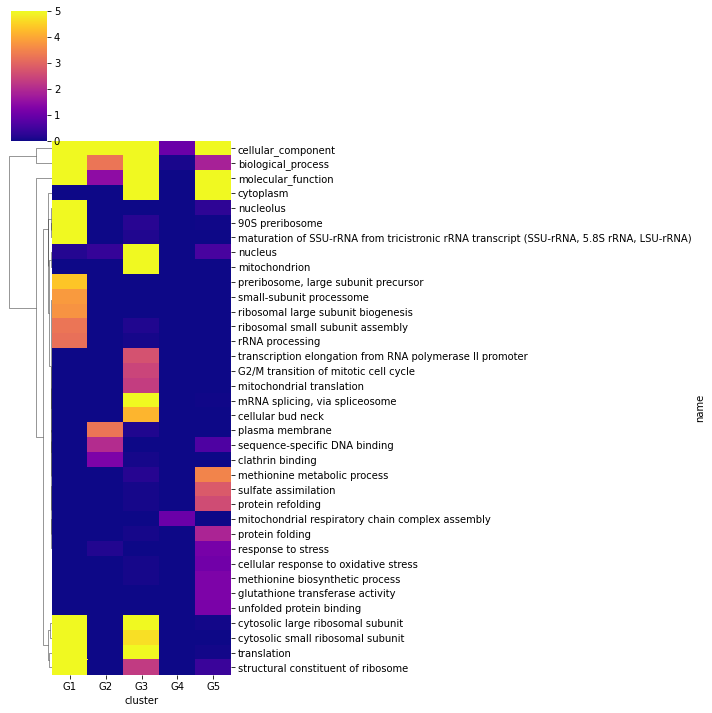

In [46]:
seaborn.clustermap(top_10, cmap="plasma", vmax=5, col_cluster=False)
plt.savefig(outdir + 'figures/go_gene_nucs.pdf')

/data/leslie/sneha/anaconda3/envs/robocop-env/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


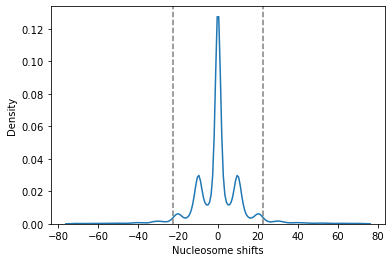

In [110]:
shifts = nuc_diff_shift_clusters[['shift_AB', 'shift_BC', 'shift_CD', 'shift_DE']].values.flatten()
m1,m2 = np.nanmean(shifts)+1.8*np.nanstd(shifts), np.nanmean(shifts)-1.8*np.nanstd(shifts)
seaborn.distplot(shifts, hist=False)
plt.axvline(m1, ls='--', color='grey')
plt.axvline(m2, ls='--', color='grey')
plt.xlabel("Nucleosome shifts")
plt.savefig(outdir + 'figures/nuc_shift.pdf')